In [1]:
import pandas as pd
import re
import nltk

## Data Read in ##

In [2]:
temp_cfa = pd.read_csv('broadway_deh01.csv', index_col = False, delimiter='\t')

In [4]:
temp_cfa.sample(10)

,contribution,date,full_text,helpful,rating,showname,title,user
21,6,"March 15, 2018",According to all the reviews this was a sure t...,5,4,Dear Evan Hansen,I know I’m supposed to love it ...,samiamtravel
105,1,"June 5, 2017","Overall, a fantastic experience. I didn't know...",1,5,Dear Evan Hansen,Dear Evan Hansen - Amazing,Steven P
19,186,"March 14, 2018",We have seen so many musicals in NYC. Dear Eva...,56,5,Dear Evan Hansen,Amazing and Touching Show,CathyCole
30,56,"February 23, 2018",We got tickets for a February show back in Oct...,14,5,Dear Evan Hansen,Just go...you won’t regret it,ellalivi04
39,97,"January 20, 2018","Visiting my bestie in New York, she spoiled my...",33,5,Dear Evan Hansen,Just so amazing....loved the music..could watc...,Janine K
184,33,"May 30, 2018","Dear Evan Hansen was amazing, everyone should ...",11,5,Dear Evan Hansen,So good,Amparo P
33,14,"February 25, 2018",We already had tickets to Hamilton; yet I was ...,13,5,Dear Evan Hansen,"Incredibly moving, profound message, & beautif...",LuxeTravelLisa
29,6,"February 20, 2018","Great music, good character development & most...",5,5,Dear Evan Hansen,Excellent ... and I hate theatre shows,rhett2344
189,40,"June 18, 2018",The story in this play is so relatable to anyo...,25,5,Dear Evan Hansen,One of the best Broadway shows I've ever seen!!!,rmr23
192,15,"May 12, 2018",Outstanding musical theatre production! Seriou...,3,5,Dear Evan Hansen,Dear Evan Hansen,woppit1


In [5]:
temp_cfa.groupby('rating').count()

,contribution,date,full_text,helpful,showname,title,user
rating,,,,,,,
1,3,3,3,3,3,3,3
2,2,2,2,2,2,2,2
3,6,6,6,6,6,6,6
4,16,16,16,16,16,16,16
5,167,167,167,167,167,167,167


In [6]:
temp_cfa['full_text'] = temp_cfa['full_text'].fillna('')

In [7]:
print(sum(temp_cfa['full_text'] == '') / temp_cfa.shape[0])

0.0


## Simple preprocessing

In [8]:
temp_cfa['full_text'] = temp_cfa['full_text'].apply(lambda x: " ".join(x.lower() for x in x.split())) # Lower case
temp_cfa['full_text'] = temp_cfa['full_text'].apply(lambda x: re.sub('http\S*', '', x)) # remove html links
temp_cfa['full_text'] = temp_cfa['full_text'].apply(lambda x: re.sub('\s+', ' ', x))  # remove extra spaces
temp_cfa['full_text'] = temp_cfa['full_text'].apply(lambda x: re.sub('[^\w\s]','', x))  # remove all the non-alphanumeric characters
temp_cfa.sample(10)

,contribution,date,full_text,helpful,rating,showname,title,user
40,12,"January 21, 2018",loved loved loved this play excellent actorsac...,2,5,Dear Evan Hansen,Broadway show,antoinettegentile
3,1,"January 10, 2017",in 2009 broadway was forever changed by a comp...,5,3,Dear Evan Hansen,Poor man's Next to Normal,Aleeigh
55,45,"October 22, 2017",what an amazing show its an emotional roller c...,19,5,Dear Evan Hansen,WOW,Mollaroo
10,41,"August 7, 2017",i love fun musicals that make you feel good wh...,20,5,Dear Evan Hansen,Outstanding!,LilyVonSchtupp
122,127,"April 3, 2017",i cant say enough about this incredible musica...,35,5,Dear Evan Hansen,Absolutely incredible!,GlobalOkie
9,411,"July 14, 2017",my daughter chose this one and it was truly ex...,268,5,Dear Evan Hansen,Excellent,misanthropicdreamer
1,204,"November 27, 2016",what an amazing broadway show the story the st...,38,5,Dear Evan Hansen,Phenomenal Broadway Musical,1210tgho
132,25,"March 4, 2017",i go to one broadway show a year for my wifes ...,9,5,Dear Evan Hansen,Great show,Steve S
140,3,"February 1, 2017",we both loved it i would definitely not sugges...,2,5,Dear Evan Hansen,Christmas Present for my 13 year old son!,Brake24
53,338,"October 1, 2017",be ready to feel every emotionthis brilliant p...,86,5,Dear Evan Hansen,POWERFUL!!!,Michael A


In [9]:
# Load in stopwords in English
from nltk.corpus import stopwords
stop = stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [10]:
# Add extra stopwords
extra_stop = ['evan','dear','hansen','people','kinky', 'disney', 'boot', 'boots', 'jersey', 'boy','boys','chicago','les','miz','miserables' 'best', 'really','excellent', 'production', 'wonderful', 'incredible', 'great', 'amazing', 'show', 'musical', 'broadway', 'phantom', 'lion', 'king', 'go', 'see', 'hamilton', 'wicked', 'play', 'book', 'mormon', 'sleep', 'one', 'time', 'good']
stop = list(set(stop + extra_stop))
print(len(stop))

218


In [11]:
# remove stopwords in the text
temp_cfa['full_text'] = temp_cfa['full_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [12]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
WNL = nltk.WordNetLemmatizer()

In [13]:
temp_cfa['full_text_n'] = temp_cfa['full_text']

In [14]:
# Lemmatize
temp_cfa['full_text_n'] = temp_cfa['full_text_n'].apply(lambda x: ' '.join([WNL.lemmatize(y) for y in x.split()]))

In [16]:
temp_cfa.sample(10)

,contribution,date,full_text,helpful,rating,showname,title,user,full_text_n
39,97,"January 20, 2018",visiting bestie new york spoiled son tickets w...,33,5,Dear Evan Hansen,Just so amazing....loved the music..could watc...,Janine K,visiting bestie new york spoiled son ticket wi...
115,64,"May 3, 2017",picked day ticket stubhub new york business ti...,26,5,Dear Evan Hansen,Phenomenal show,David R,picked day ticket stubhub new york business ti...
187,73,"June 15, 2018",went recommendation friend happy done tough su...,13,5,Dear Evan Hansen,Nice Balance of Drama and Comedy,MrsSunsh1ne,went recommendation friend happy done tough su...
1,204,"November 27, 2016",story strong performance cast lead ben platt s...,38,5,Dear Evan Hansen,Phenomenal Broadway Musical,1210tgho,story strong performance cast lead ben platt s...
86,26,"July 29, 2017",ben platts stellar performance moved tears fir...,12,5,Dear Evan Hansen,"Moving, important",tlee102,ben platts stellar performance moved tear firs...
87,64,"August 4, 2017",purchased tickets daughter several months ago ...,22,5,Dear Evan Hansen,YOU MUST SEE THIS SHOW!!!,MPRH11,purchased ticket daughter several month ago th...
141,188,"February 1, 2017",emotionally intense fantastic ben platt except...,117,5,Dear Evan Hansen,Go see this show now!!,Knows,emotionally intense fantastic ben platt except...
0,23,"June 19, 2018",moved tears multiple times actors poured heart...,37,5,Dear Evan Hansen,Arguably the Best Show on Broadway,Larangie F,moved tear multiple time actor poured heart ma...
150,26,"January 7, 2017",purchased tickets daughter asked christmas sai...,16,5,Dear Evan Hansen,Christmas present for my daughter!,KJaworski,purchased ticket daughter asked christmas said...
192,15,"May 12, 2018",outstanding theatre serious content handled se...,3,5,Dear Evan Hansen,Dear Evan Hansen,woppit1,outstanding theatre serious content handled se...


## Generate WordCloud

In [17]:
from wordcloud import WordCloud

In [18]:
# Generate wordcloud object wc
wc = WordCloud(max_words=2000, width=1000, height=800)
# generate word cloud
wc.generate(''.join(temp_cfa['full_text_n']))

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

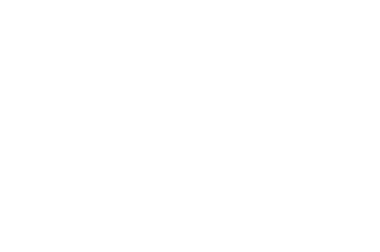

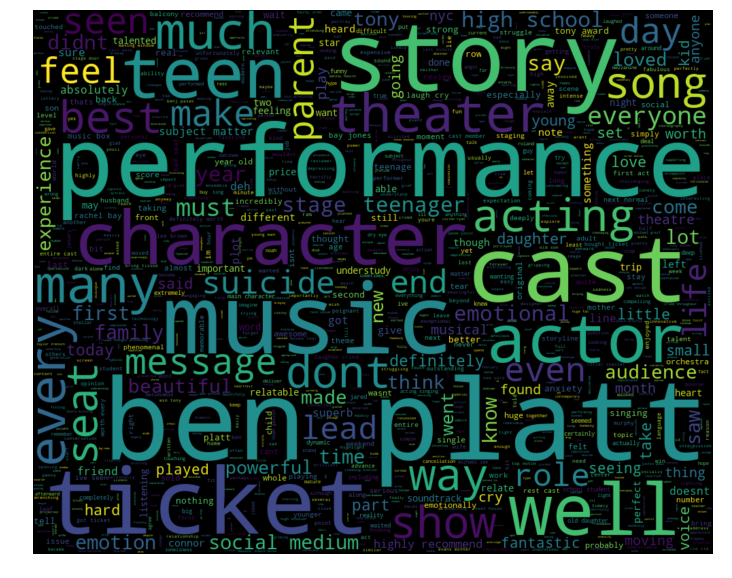

In [20]:
plt.axis("off")
plt.figure(figsize=(15, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()